# Analysing APERTIF data

This notebook reades a data table from a .fits file using astropy. More information on reading fits tables: https://docs.astropy.org/en/stable/io/fits/usage/table.html

This is a data table from the Apertif HI catalogue DR2.

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# path + name of the file
fits_table_filename ="/home/anyeldavid/Desktop/7th semester linux/Galaxies/apertif_clean_cat.v0.11apr2024.fits"

# open the file
hdul = fits.open(fits_table_filename)  # open a FITS file

# extract the data table
data = hdul[1].data
# extract the header information
header = hdul[1].header

# close the fits file
hdul.close()

In [5]:
# check the contents of the data
# print the first two rows
first_two_rows = data[:2]
first_two_rows

FITS_rec([('SoFiA J132252.07+350919.0', 1,  323.266862, 1684.583931, 1174.770141,  307,  337, 1673, 1696, 1166, 1182,  2739, -0.005567, 0.018839, 13096.9, 0., 0, 0.216556, 2.051971, 2.612075, 1.262522, 2.011043, 0.001607  , 512261., 407082., 442081., 10.275157, 5.824592, 61.735901, 10.079355,  6.203427, 76.818542, 260.857066, 0.247458, 0.194014, 0.166076, 659.316403, 200.716956, 35.155284, 1.41686e+09,  323, 1684, 1177, 200.717478, 35.154303, 1.41694e+09, 'M1315+3356'),
          ('SoFiA J131007.34+341111.8', 2, 1894.545869, 1099.238523, 1166.062909, 1837, 1937, 1071, 1140, 1154, 1182, 15897, -0.003839, 0.026145, 60699.9, 0., 0, 0.077535, 1.638576, 2.611269, 2.380676, 6.839979, 0.00091761, 707811., 624778., 681397., 45.042589, 9.762384, 60.6183  , 53.106027, 11.254891, 59.807734, 251.588519, 0.285707, 0.179319, 0.076245, 906.752742, 197.530588, 34.186609, 1.41654e+09, 1905, 1096, 1160, 197.509622, 34.180982, 1.41632e+09, 'M1315+3356')],
         dtype=(numpy.record, [('name', 'S25'), (

In [6]:
# to view the keywords of the column names and the data type
print(data.dtype)

(numpy.record, [('name', 'S25'), ('id', '>i8'), ('x', '>f8'), ('y', '>f8'), ('z', '>f8'), ('x_min', '>i8'), ('x_max', '>i8'), ('y_min', '>i8'), ('y_max', '>i8'), ('z_min', '>i8'), ('z_max', '>i8'), ('n_pix', '>i8'), ('f_min', '>f8'), ('f_max', '>f8'), ('f_sum', '>f8'), ('rel', '>f8'), ('flag', '>i8'), ('fill', '>f8'), ('mean', '>f8'), ('std', '>f8'), ('skew', '>f8'), ('kurt', '>f8'), ('rms', '>f8'), ('w20', '>f8'), ('w50', '>f8'), ('wm50', '>f8'), ('ell_maj', '>f8'), ('ell_min', '>f8'), ('ell_pa', '>f8'), ('ell3s_maj', '>f8'), ('ell3s_min', '>f8'), ('ell3s_pa', '>f8'), ('kin_pa', '>f8'), ('err_x', '>f8'), ('err_y', '>f8'), ('err_z', '>f8'), ('err_f_sum', '>f8'), ('ra', '>f8'), ('dec', '>f8'), ('freq', '>f8'), ('x_peak', '>i8'), ('y_peak', '>i8'), ('z_peak', '>i8'), ('ra_peak', '>f8'), ('dec_peak', '>f8'), ('freq_peak', '>f8'), ('field', 'S10')])


In [39]:
print(header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  395 / length of dimension 1                          NAXIS2  =                 1586 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   47 / number of table fields                         TTYPE1  = 'name    '                                                            TFORM1  = '25A     '                                                            TTYPE2  = 'id      '                                                            TFORM2  = 'K       '                                                            TTYPE3  = 'x       '                    

In [7]:
# check one column of the data
print(data['freq'])
print((data['freq']).size)
#print(data['name'])
print(data.size)

[1.41686e+09 1.41654e+09 1.41632e+09 ... 1.37939e+09 1.37751e+09
 1.37524e+09]
1586
1586


In [38]:
# check the header of the data


In [9]:
# how many rows are in the table?
print('Number of rows: ', len(data) )

Number of rows:  1586


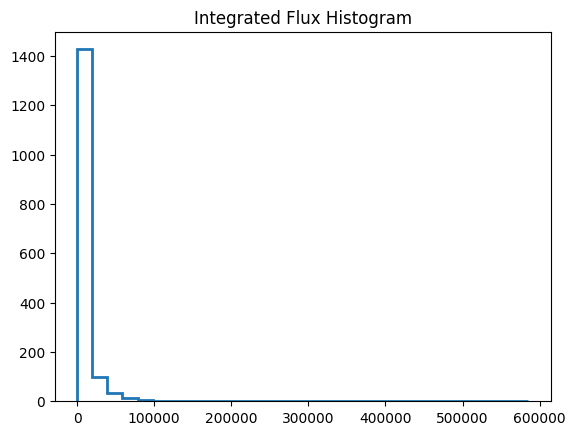

In [10]:
# make a histogram

fig,ax=plt.subplots()
ax.hist(data['f_sum'], bins=30,histtype='step',lw=2,alpha=1)
plt.title('Integrated Flux Histogram')
plt.show()

Text(0, 0.5, 'Dec [deg]')

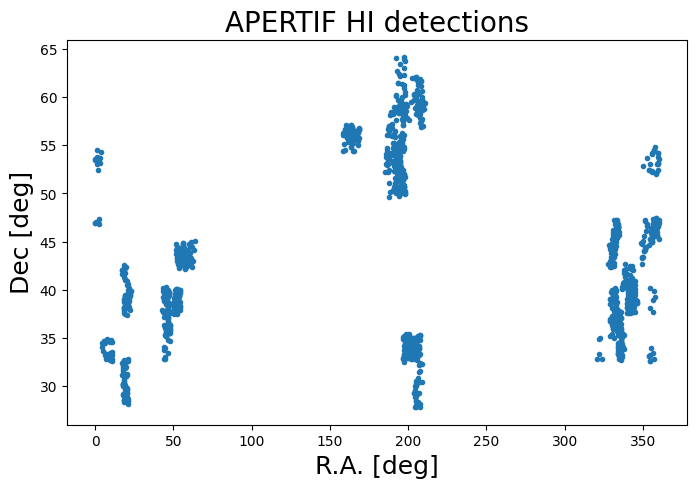

In [11]:
# make a scatterplot

plt.figure(figsize=(8,5))
plt.title('APERTIF HI detections', size=20)
plt.plot(data['ra'], data['dec'], linestyle = '', marker = '.')
plt.xlabel("R.A. [deg]", size=18)
plt.ylabel("Dec [deg]", size=18)

# Tasks

1) Make a plot of HI mass (y-axis) vs. luminosity distance (x-axis). For this calculate the luminsoty distance by converting the frequency (freq) to velocity (use the optical convention, and rest frequency of 1.420405752 GHz) and then to distance using the Hubble law. Then calculate the HI mass from the total Flux (f_sum), and using the calculated distance.   

Information on converting frequencies to velocities: https://docs.astropy.org/en/stable/units/equivalencies.html (Spectral (Doppler) Equivalencies)

Calculating the HI mass of a galaxy: https://egg.astro.cornell.edu/alfalfa/ugrad/himass.htm Note that the total Flux (f_sum) is in Jy Hz units and needs to get converted to Jy km/s. To do this conversion we need to devide with the channel width in Hz (36621.0937500 Hz) and multiply with the channel width in km/s.

2) Make a histogram of the 50\% line HI line width (w50) and the 20\% line HI line width (w20)

##Task 1: Plot of Luminosity Distance vs HI mass

In [12]:
# converting channel width from Hz to km/s

restfreq = 1.420405752 * u.GHz  # rest frequency
freq_to_vel = u.doppler_optical(restfreq)
print(freq_to_vel+freq_to_vel)

chan_bottom = ((1.41686e+09 + 36621.0937500) * u.Hz).to(u.km / u.s, equivalencies=freq_to_vel)
chan_top = ((1.41686e+09) * u.Hz).to(u.km / u.s, equivalencies=freq_to_vel)
channel_width = chan_top - chan_bottom

print(chan_top ,chan_bottom,  channel_width)

[(Unit("Hz"), Unit("km / s"), <function doppler_optical.<locals>.to_vel_freq at 0x7f064dfdd440>, <function doppler_optical.<locals>.from_vel_freq at 0x7f064dfdd620>), (Unit("Angstrom"), Unit("km / s"), <function doppler_optical.<locals>.to_vel_wav at 0x7f064dfdd9e0>, <function doppler_optical.<locals>.from_vel_wav at 0x7f064dfdd8a0>), (Unit("eV"), Unit("km / s"), <function doppler_optical.<locals>.to_vel_en at 0x7f064dfdd6c0>, <function doppler_optical.<locals>.from_vel_en at 0x7f064dfdd800>), (Unit("Hz"), Unit("km / s"), <function doppler_optical.<locals>.to_vel_freq at 0x7f064dfdd440>, <function doppler_optical.<locals>.from_vel_freq at 0x7f064dfdd620>), (Unit("Angstrom"), Unit("km / s"), <function doppler_optical.<locals>.to_vel_wav at 0x7f064dfdd9e0>, <function doppler_optical.<locals>.from_vel_wav at 0x7f064dfdd8a0>), (Unit("eV"), Unit("km / s"), <function doppler_optical.<locals>.to_vel_en at 0x7f064dfdd6c0>, <function doppler_optical.<locals>.from_vel_en at 0x7f064dfdd800>)]
750

In [13]:
data.columns

ColDefs(
    name = 'name'; format = '25A'
    name = 'id'; format = 'K'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'z'; format = 'D'
    name = 'x_min'; format = 'K'
    name = 'x_max'; format = 'K'
    name = 'y_min'; format = 'K'
    name = 'y_max'; format = 'K'
    name = 'z_min'; format = 'K'
    name = 'z_max'; format = 'K'
    name = 'n_pix'; format = 'K'
    name = 'f_min'; format = 'D'
    name = 'f_max'; format = 'D'
    name = 'f_sum'; format = 'D'
    name = 'rel'; format = 'D'
    name = 'flag'; format = 'K'
    name = 'fill'; format = 'D'
    name = 'mean'; format = 'D'
    name = 'std'; format = 'D'
    name = 'skew'; format = 'D'
    name = 'kurt'; format = 'D'
    name = 'rms'; format = 'D'
    name = 'w20'; format = 'D'
    name = 'w50'; format = 'D'
    name = 'wm50'; format = 'D'
    name = 'ell_maj'; format = 'D'
    name = 'ell_min'; format = 'D'
    name = 'ell_pa'; format = 'D'
    name = 'ell3s_maj'; format = 'D'
    name = 'ell3s_min'

### SOLUTION

In [14]:

import scipy.constants as cons
c=3e5
# Function to calculate the luminosity distance and H1 mass of galaxies.
data_freq=np.array(data['freq'])
data_fsum=np.array(data['f_sum'])

def luminosity_H1mass(freq_to_velocity,data_frequency,data_fsum):
    freq_observed=data_frequency*u.Hz
    sum_ff=((data_fsum)/36621.0967500*channel_width)*u.Jy * u.km / u.s
    H0 = 70 * (u.km / u.s /u.Mpc)
    velocity= freq_observed.to(u.km / u.s, equivalencies=freq_to_velocity)
    distanceHubble= (velocity/H0)
    HImass=(2.36e5*(distanceHubble**2)*sum_ff)
    return distanceHubble,HImass



In [15]:
#freq_observed

In [16]:
#velocity

In [17]:
#distanceHubble

In [18]:
distanceHubble,HImass=luminosity_H1mass(freq_to_vel,data_freq,data_fsum)

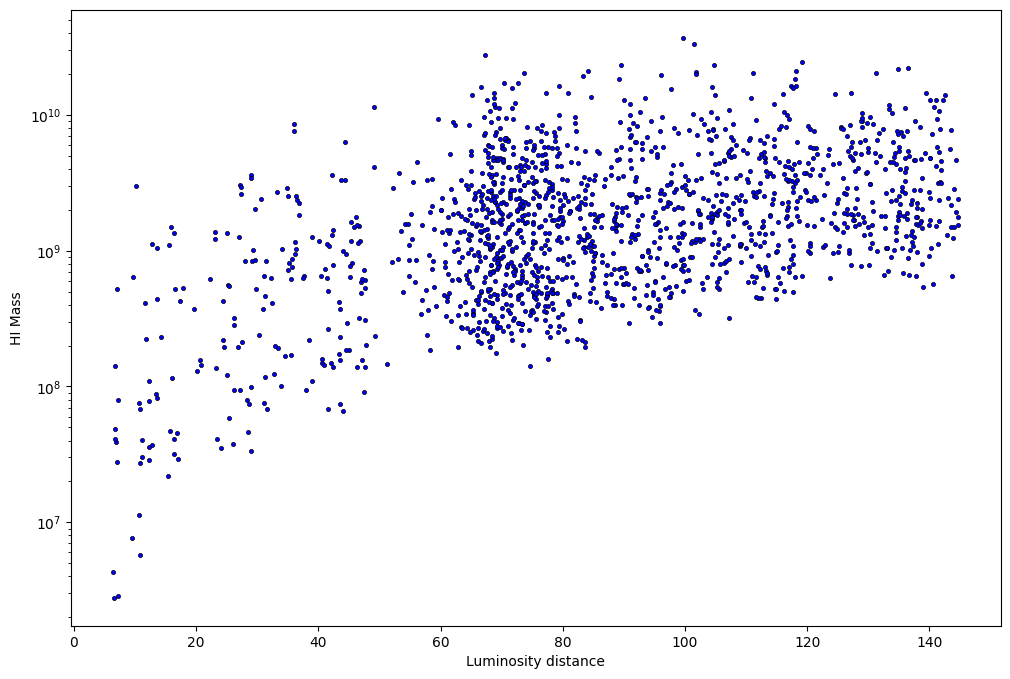

In [19]:
#PLOT
plt.figure(figsize=(12,8))
plt.plot(abs(distanceHubble.value),abs(HImass.value),markerfacecolor='blue',markersize=3,marker="o",linestyle='',markeredgecolor='black',markeredgewidth='0.5')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Luminosity distance')
plt.ylabel('HI Mass')
#plt.grid()
plt.show()

##Task 2: Histograms w50, w20

Text(0.5, 1.0, 'Histogram')

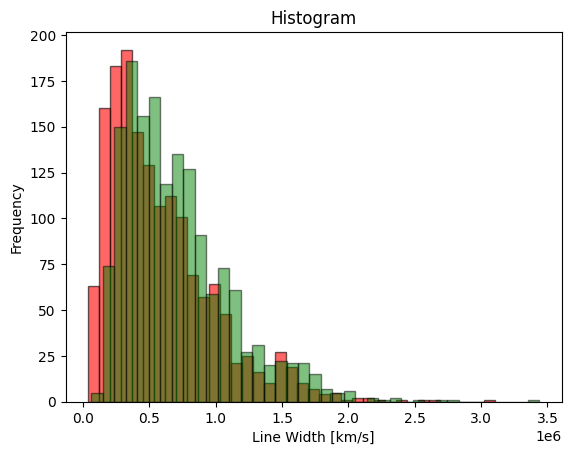

In [20]:
# Solution 2
w50=np.array(data['w50'])
w20=np.array(data['w20'])
#print(len(w20))
plt.hist(w50, bins='auto', edgecolor='black',color='r',alpha=0.6)
plt.hist(w20, bins='auto', edgecolor='black',color='g',alpha=0.5)
plt.xlabel('Line Width [km/s]')
plt.ylabel('Frequency')
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram w50')

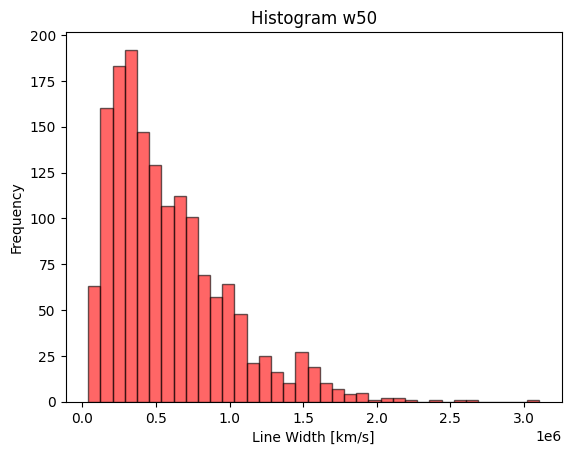

In [21]:
# Solution 2
w50=np.array(data['w50'])
#print(len(w20))
plt.hist(w50, bins='auto', edgecolor='black',color='r',alpha=0.6)

plt.xlabel('Line Width [km/s]')
plt.ylabel('Frequency')
plt.title('Histogram w50')

Text(0.5, 1.0, 'Histogram w20')

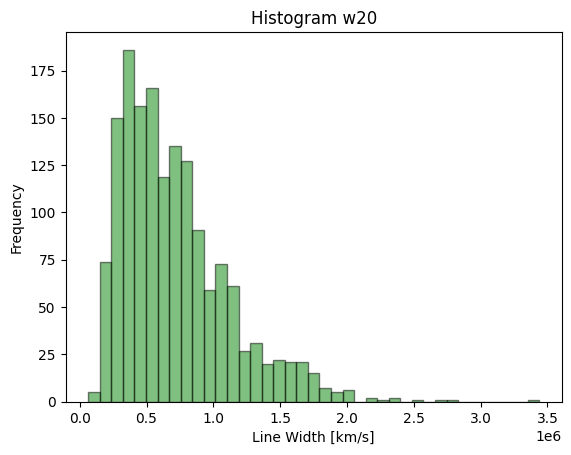

In [22]:
# Solution 2
w20=np.array(data['w20'])
#print(len(w20))
plt.hist(w20, bins='auto', edgecolor='black',color='g',alpha=0.5)
plt.xlabel('Line Width [km/s]')
plt.ylabel('Frequency')
plt.title('Histogram w20')

In [23]:
#print(data.info('stats'))

In [24]:
print(data['w50'][:10])

[ 407082.  624778.  313625.  641656.  188530.  203806.  153424.  566154.
 1202700.  538582.]


##Task 3:

The new task:

-Select specific R.A and Dec regions of the data and plot the HI mass against the luminosity distance.

-Where the galaxies are on the diagram compared to the full data set.


In [25]:
# Selection of different regions of the data
def selec_regionsRA_Dec(data_dec,data_ra,data_fsum,data_freq):
    array_dec=np.array(data_dec)
    array_ra=np.array(data_ra)
    sum_ff=np.array(data_fsum)
    freq=np.array(data_freq)
    new_arra_dec1=[]
    new_arra_ra1=[]
    new_sumff1=[]
    new_freq1=[]
    ############
    new_arra_dec2=[]
    new_arra_ra2=[]
    new_sumff2=[]
    new_freq2=[]
    ############
    new_arra_dec3=[]
    new_arra_ra3=[]
    new_sumff3=[]
    new_freq3=[]
    for i in range(len(array_ra)):
        if array_ra[i]>=0 and array_ra[i]<=100:
            new_arra_dec1.append(array_dec[i])
            new_arra_ra1.append(array_ra[i])
            new_sumff1.append(sum_ff[i])
            new_freq1.append(freq[i])
        if array_ra[i]>100 and array_ra[i]<=250:
            new_arra_dec2.append(array_dec[i])
            new_arra_ra2.append(array_ra[i])
            new_sumff2.append(sum_ff[i])
            new_freq2.append(freq[i])
        if array_ra[i]>250 and array_ra[i]<=400 :
            new_arra_dec3.append(array_dec[i])
            new_arra_ra3.append(array_ra[i])
            new_sumff3.append(sum_ff[i])
            new_freq3.append(freq[i])

    region1=np.array([new_arra_dec1,new_arra_ra1,new_sumff1,new_freq1])
    region2=np.array([new_arra_dec2,new_arra_ra2,new_sumff2,new_freq2])
    region3=np.array([new_arra_dec3,new_arra_ra3,new_sumff3,new_freq3])
    return region1,region2,region3



In [26]:
region1,region2,region3=selec_regionsRA_Dec(data['dec'],data['ra'],data['f_sum'],data['freq'])

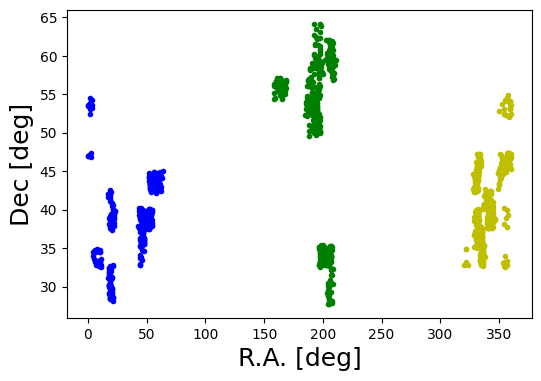

In [27]:
plt.figure(figsize=(6,4))
plt.plot(region1[1],region1[0],color='b',linestyle='',marker='.')
plt.plot(region2[1],region2[0],color='g',linestyle='',marker='.')
plt.plot(region3[1],region3[0],color='y',linestyle='',marker='.')
plt.xlabel("R.A. [deg]", size=18)
plt.ylabel("Dec [deg]", size=18)
plt.show()

In [28]:
#FIRST REGION 
distanceHubble1,HImass1=luminosity_H1mass(freq_to_vel,region1[3],region1[2])
#SECOND REGION
distanceHubble2,HImass2=luminosity_H1mass(freq_to_vel,region2[3],region2[2])
#THIRD REGION
distanceHubble3,HImass3=luminosity_H1mass(freq_to_vel,region3[3],region3[2])



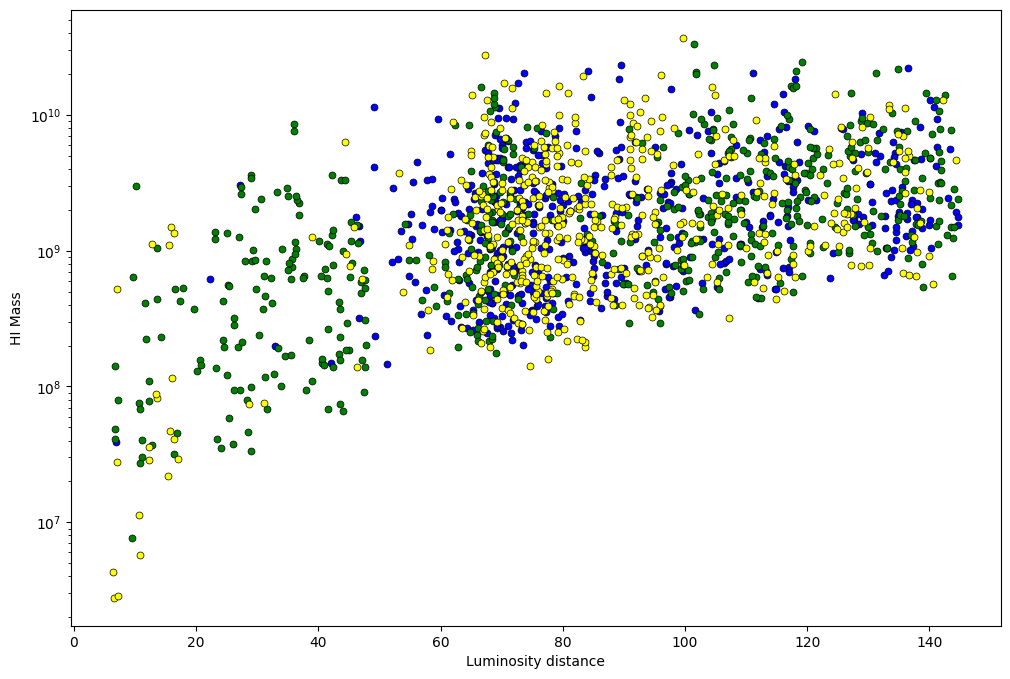

In [29]:
#PLOT
plt.figure(figsize=(12,8))
#plt.plot(abs(distanceHubble.value),abs(HImass.value),markerfacecolor='blue',markersize=3,marker="o",linestyle='',markeredgecolor='black',markeredgewidth='0.5')
plt.plot(abs(distanceHubble1.value),abs(HImass1.value),markerfacecolor='blue',markersize=5,marker="o",linestyle='',markeredgecolor='black',markeredgewidth='0.5')
plt.plot(abs(distanceHubble2.value),abs(HImass2.value),markerfacecolor='green',markersize=5,marker="o",linestyle='',markeredgecolor='black',markeredgewidth='0.5')
plt.plot(abs(distanceHubble3.value),abs(HImass3.value),markerfacecolor='yellow',markersize=5,marker="o",linestyle='',markeredgecolor='black',markeredgewidth='0.5')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Luminosity distance')
plt.ylabel('HI Mass')
#plt.grid()
plt.show()